# Problem Set 4: 

### 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def binary_search(func, x1, x2, e): 
    """
    Uses binary search to find the root of a function between x1 and x2
    to accuracy given by 1.
    
    Parameters: 
    func: The function to find the root of
    x1, x2: the beginning interval to search for the root on
    e: the accuracy to which the root is identified
    """
    # Check if the sides of the interval bound a root
    if func(x1) * func(x2) > 0:
        return print("The interval doesn't bound a root or bounds an even number of roots")
    # Check if one of them is the root
    elif func(x1) == 0: 
        return x1, _, _
    elif func(x2) == 0:
        return x2, _, _
    #Otherwise perform binary search
    else:
        # Define lists to store the guess and the width of the interval in
        guess = []
        width = []
        while abs(x1 - x2) > e:
        # Calculate the midpoint, evaluate the function there
            width.append(abs(x1 - x2))
            mid = 0.5 * (x1 + x2)
            fm = func(mid)
            guess.append(mid)
            if fm * func(x1) > 0:
                x1 = mid
            else:
                x2 = mid
        return 0.5 * (x1 + x2), guess, width

def newton(f, df, x1, e): 
    """
    Uses Newtons method to find the roots of func usign starting position 
    x1 to accuracy e. 
    
    Parameters: 
    f: The function to find the roots of
    df: the derivative of the function to find the roots of
    x1: the initial guess for the roots
    e: The accuracy to which the root is identified
    """
    # Define lists to store the the guess and and error in
    delta = [1]
    guess = [x1]
    while abs(f(x1)/df(x1)) > e: # For the difference between guesses greater than target accuracy
        # Create a next guess according to newtons method
        delta.append(f(x1)/df(x1))
        x1 -= delta[-1]
        guess.append(x1)
    return x1, guess, delta

### a) $x^2 = a$ for  $a = 2$

x = 1.414213562372879
newton Root = 1.4142135623730951


Text(0.5, 1.0, 'Root finding for $x^2 = 2$')

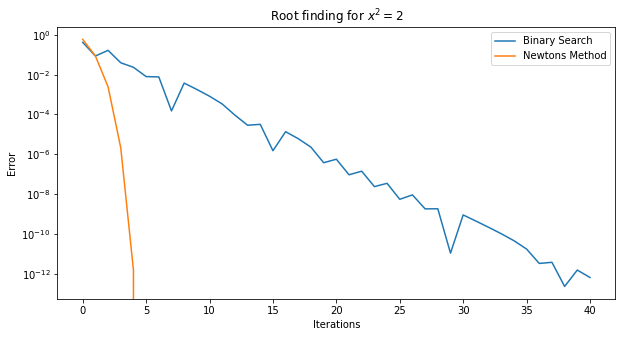

In [3]:
# Define the function and it's derivative:
def func(x): 
    return  x**2 - 2

def dfunc(x): 
    return 2 * x

root = np.sqrt(2)

# Choose the positive root and perform bindary search
binary_root, guess, _ = binary_search(func, 0, 2, 1e-12)
print(f"x = {binary_root}")
# Plot the error
fig, ax = plt.subplots(1, 1, figsize = (10, 5,))
ax.plot(np.arange(len(guess)), abs(root - guess), label = "Binary Search")
ax.set_yscale('log')

# Again choosing the positive root and performing newtons search this time
newton_root, nGuess, _ = newton(func, dfunc, 2, 1e-12)
print(f"newton Root = {newton_root}")
# Again plotting the error
ax.plot(np.arange(len(nGuess)), abs(root - nGuess), label = "Newtons Method")
ax.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("Error")
ax.set_title("Root finding for $x^2 = 2$")


The reason that the error for the newtons search method looks like it drops off to zero and then reappears is that the function is stopped when difference between the previous guess and the current guess is below some criteria. Therefore the difference between the actual root and the computed root can be arbitrarily small and the functoin could continue if the difference between the previous estimate and the current is still greater than whatever the threshold is. 

#### b)

x = 1.9621892875788944
newton Root = 1.9621892875785716


Text(0.5, 1.0, 'Root finding for keplers equation for e = 0.5, M = 1.5')

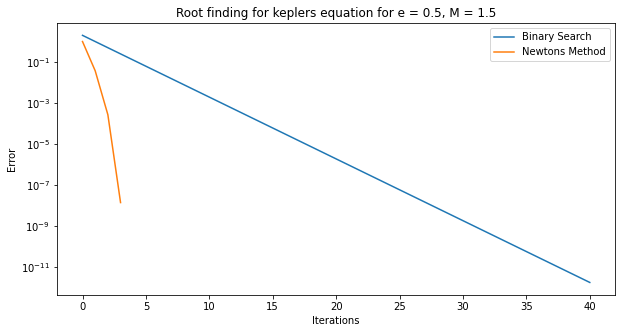

In [4]:
# define the function and it's derivative
def kepler(E):
    # Return the function
    return E - e * np.sin(E) - M

def dkepler(E):
    return 1 - e * np.cos(E)

# Define the value of e and M 
e = 0.5
M = 1.5

# Perform binary search and plot the error
binary_root, _, width= binary_search(kepler, 0, 2, 1e-12)
print(f"x = {binary_root}")
fig, ax = plt.subplots(1, 1, figsize = (10, 5,))
ax.plot(np.arange(len(width)), width, label = "Binary Search")
ax.set_yscale('log')

# Perform newtons search and plot the error
newton_root, _, delta = newton(kepler, dkepler, 2, 1e-12)
print(f"newton Root = {newton_root}")
ax.plot(np.arange(len(delta)), delta, label = "Newtons Method")
ax.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("Error")
ax.set_title("Root finding for keplers equation for e = 0.5, M = 1.5")

x = 2.217997202598819
newton Root = 2.2179972025985775


Text(0.5, 1.0, 'Root finding for keplers equation for e = 0.5, M = 1.5')

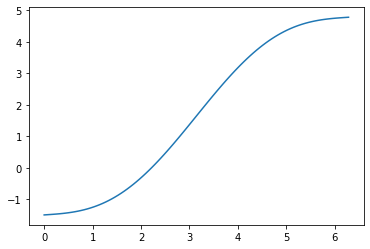

<Figure size 360x360 with 0 Axes>

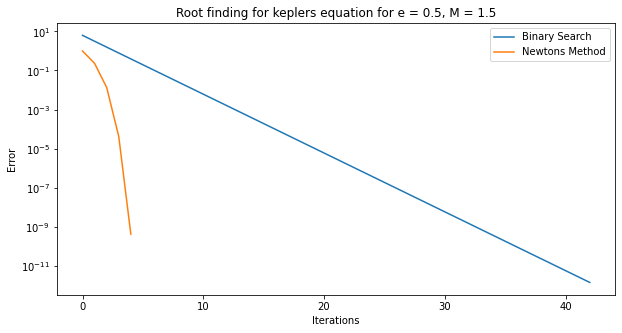

In [5]:
# Redefine the value of e
e = 0.9

# Plot the function to inform initial guesses
E = np.linspace(0, 2*np.pi, 100)
y = kepler(E)
plt.plot(E, y)
plt.figure(figsize = (5, 5))

# Once again perform binary search and plot the error
binary_root, _, width = binary_search(kepler, 0, 2*np.pi, 1e-12)
print(f"x = {binary_root}")
fig, ax = plt.subplots(1, 1, figsize = (10, 5,))
ax.plot(np.arange(len(width)), width, label = "Binary Search")
ax.set_yscale('log')

# Once again perform binary search and plot the error
newton_root, _, delta = newton(kepler, dkepler, 2, 1e-12)
print(f"newton Root = {newton_root}")
ax.plot(np.arange(len(delta)), [abs(d) for d in delta], label = "Newtons Method")
ax.legend()
ax.set_xlabel("Iterations")
ax.set_ylabel("Error")
ax.set_title("Root finding for keplers equation for e = 0.5, M = 1.5")

This time the width of the interval for the binary search and the difference between successive guesses is used in lieu of the exact error since the solution to the root finding problem has no closed form. Choosing starting points near $2\pi$ when the eccentricity is near 1 causes newtons method to take many more iterations to reach the correct answer. This is because the derivative of the function near $2\pi$ is nearly 0. 

### 2)
The highest precision possible corresponds to the smalled difference between two numbers in python. This is about $1\times 10 ^ {-15}$. Also we'd like to know how fast either method is able to do this accuracy. 

In [6]:
import time
e = 0.9

# Begin timer
tic = time.process_time()

# Perform binary search using 1e-15 as the accuracy
binary_root, _, width = binary_search(kepler, 0, 2*np.pi, 1e-15)
toc = time.process_time() # stop the timer and print the results
time_binary = toc - tic
print(time_binary, len(width))

# Do the same as above substituting newtons method for binary search
tic = time.process_time()
newton_root, _, delta = newton(kepler, dkepler,  2, 1e-15)
toc = time.process_time()
time_newton = toc - tic

# Print the results
print(time_newton, len(delta))
print(time_binary/time_newton)

0.00048059000000000296 53
0.0002814159999999788 5
1.707756488614859


Measuring speed by the number of iterations required, newtons method performs much better requiring only 6 iterations versus the 53 required by the bisection method. Newtons method was also 3 times faster measured in seconds. 

Text(0, 0.5, '$cos(E)$')

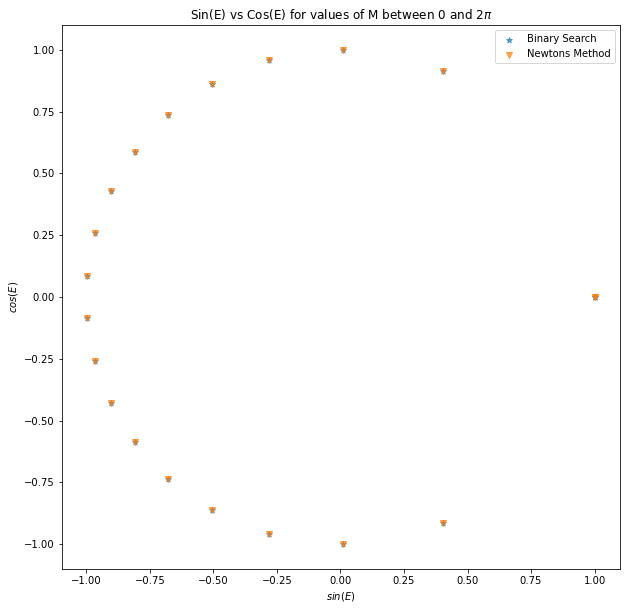

In [7]:
# Create 20 equally space  points between 0 and 2pi
Ms = np.linspace(0, 2*np.pi, 20)
# set the eccentricity equal to 0.9
e = 0.9

# Create arrays to store the calcualted values of E in
binary_sol = []
newton_sol = []

# Calculate estimates of E for every value of M
for m in Ms: 
    M = m
    # Use binary search
    r, _, _ = binary_search(kepler, 0, 2*np.pi, 1e-15)
    binary_sol.append(r)
    # Use newtons method
    nr, _, _ = newton(kepler, dkepler, 2, 1e-15)
    newton_sol.append(nr)

# Plot the results for the positions around the ellipse of the found by newton and binary search methods.
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.scatter([np.cos(E) for E in binary_sol], [np.sin(E) for E in binary_sol], 
           label = "Binary Search", marker = '*', alpha = 0.7)
ax.scatter([np.cos(E) for E in newton_sol], [np.sin(m) for m in newton_sol], 
           label = "Newtons Method", marker = 'v', alpha = 0.7)

ax.legend()
ax.set_title("Sin(E) vs Cos(E) for values of M between 0 and $2\pi$")
ax.set_xlabel('$sin(E)$')
ax.set_ylabel('$cos(E)$')

This distribution of points is to be expected. The "time" between any of the above points is the same, however it is obvious from the above that the object was a faster velocity on the right side of the orbit. The overlapping points in the above plot show that the accuracy of the bisection and newtons method is the same, however, as shown above newtons method is capable of performing the calcualtion in many fewer iterations and therefore much faster. 

### 3)  
 The $\chi^2$ distribution given in the homework as equation 1 gives the goodness of fit of a model to a set of data. By minimizing this function, the parameters that correspond to the best fit of the data are identified. In theory finding the parameter that minimizes the chi squared equation could be accomplished by calculating the derivative and setting it equal to 0. In practice computing the derivative of the $\chi^2$ function is not easy and therefore instead methods like gradient descent are employed. Gradient descent is the technique of root finding where the next guess for x is found using the two prior guesses for x. In practice, the first and second values for x can be guessed, the derivative calculated and if the derivative is in the appropiate direction, the method proceeds. If the derivative is in the wrong direction, another value is chosen for x2 and the method proceeds that way. successive guesses are given by
$$
x_3 = x_2 - \gamma \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$$

where $\gamma$ is some approximation for the value of $\frac{1}{f''}$ and whose sign controls whether a negative or positive is identified. 
### 4)

In [8]:
def mod(r, v_inf, r_0):
    return v_inf*(1 - np.exp(-r/r_0))

def x_2(func, r_obs, data, params):
    return sum((data - func(r_obs, *params))**2)

# Define target accuracy
e = 1e-10
# initial guess for r_0 and v_inf
r1 = 40
v1 = 100
# Define the params to start with

# Second guess to build first derivative
r2 = r1 + 1


# Read in the data
data = np.loadtxt("v_rot.txt")
r_obs = data[:, 0]
data = data[:, 1]

# Define the step size: 
gamma = 0.001
# Perform gradient descent: 
for i in range(10000):
    # Calculate the derivative w/r to r_0
    f_r1 = x_2(mod, r_obs, data, [v1, r1])
    f_r2 = x_2(mod, r_obs, data, [v1, r2])
    df = (f_r2 - f_r1) / (r2 - r1)
    x3 = r2 - gamma * df
    
    # This statement is for trouble shooting the value of gamma. 
    if i%100 == 0: 
        print(x3, r1, r2, df)
    
    # Tell the loop to stop when the difference beween successive guesses is appropriatley small 
    if abs(x3 - r2) < e: 
        print(f"The approximation of the parameter is {x3}")
        break
    # If successive guesses aren't appropriately small continue making new guesses for r_0
    else: 
        r1 = r2
        r2 = x3

40.607683985038236 40 41 392.31601496176154
3.3304577855289295 3.32969863427616 3.328248021710874 -2.2097638180554138
3.33037791724147 3.330378307591638 3.330378078577358 0.00016133588814658888
The approximation of the parameter is 3.330378107756241


The gradient decent method above finds a value for r_0 of 3.33 which is pretty close to the value listed in the homework of 3. Interestingly, in order to find a physical value for r_0 I needed to adjust the value of gamma significantly. However once I found a value that seemed to give a good answer, I could adjust the other parameters by orders of magnitude and was still able to identify an appropriate r_0. 

In order to perform gradient descent in two dimensions, it follows that you calculate the derivative of the $\chi^2$ function with resect to both variables and then step in the direction that maximizes the "down step" towards the minimum. 

In [9]:
# Define target accuracy
e = 1e-6
# initial guess for r_0 and v_inf
r1 = 10
v1 = 110
# Define the params to start with


# Second guess to build first derivative
r2 = r1 + 0.1
v2 = v1 + 0.1


# Read in the data
data = np.loadtxt("v_rot.txt")
r_obs = data[:, 0]
data = data[:, 1]

# Define the step size: 
gamma = 0.001
# Perform gradient descent: 
for i in range(10000):
    # Calculate the derivative with respect to r
    f_r1 = x_2(mod, r_obs, data, [v1, r1])
    f_r2 = x_2(mod, r_obs, data, [v1, r2])
    df_r = (f_r2 - f_r1) / (r2 - r1)
    
    # Calculate the derivative with respect to v_inf
    f_v1 = x_2(mod, r_obs, data, [v1, r1])
    f_v2 = x_2(mod, r_obs, data, [v2, r1])
    df_v = (f_v2 - f_v1) / (v2 - v1)
    
    # Choose whether to step in r space or v space
    v3 = v2 - gamma * df_v
    r3 = r2 - gamma * df_r
    
    # This statement is for trouble shooting the value of gamma. 
    if i%1000 == 0: 
        print(v3, r3, df_r, df_v)
    
    # Tell the loop to stop when the difference beween successive guesses is appropriatley small 
    if abs(v3 - v2) < e and abs(r3 - r2): 
        print(f"The approximation of the parameters is r_0 = {r3}, v_inf = {v3}")
        print(f"The number of iterations required was {i}")
        break
    # If successive guesses aren't appropriately small continue making new guesses for r_0
    else: 
        r1 = r2
        r2 = r3
        
        v1 = v2
        v2 = v3

110.3551062119171 8.132968830107995 1967.0311698920048 -255.10621191711465
110.82009431921652 4.1676295681691515 0.00415964272264554 0.05154486849151418
110.79104889015835 4.16528568087879 0.0011546664694885717 0.014310562303239628
110.78299240796458 4.1646356096224695 0.0003190376719452958 0.003965861109181469
110.78076038799897 4.164455512533782 8.710255695082322e-05 0.0010990350514620102
The approximation of the parameters is r_0 = 4.164449271349175, v_inf = 110.78068289459088
The number of iterations required was 4074


The double gradient descent method identifies the r_0 as 4 and v_inf as 110. Once again not very far from their true values. For comparison, I've used scipy.optimize.minimize below to perform the same task:

In [12]:
import scipy.optimize

# redefine the chi squared funtion:
def chi_2(params, r_obs, data):
    return sum((data - mod(r_obs, *params))**2)

# Define the initial guess for scipy
# [v_inf, r_0]
x0 = [1, 1]

# Extra arguments passed to the function
args = (r_obs, data)

fit = scipy.optimize.minimize(chi_2, x0, args = args)
print(fit.x)

[110.77990798   4.16438646]


/tmp/ipykernel_140/4096175831.py:5: RuntimeWarning: overflow encountered in square
  return sum((data - mod(r_obs, *params))**2)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Looks like the scipy minimize did as well as the gradient descent above.